In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1. Carga de datos 
---

In [2]:
# Carga de datos
df_patients = pd.read_csv("data/patients.csv")
df_services = pd.read_csv("data/services_weekly.csv")
df_staff = pd.read_csv("data/staff.csv")

print(df_patients.dtypes)

patient_id        object
name              object
age                int64
arrival_date      object
departure_date    object
service           object
satisfaction       int64
dtype: object


In [3]:
# Convertimos arrival_date y departure_date a formato datetime
df_patients["arrival_date"] = pd.to_datetime(df_patients["arrival_date"])
df_patients["departure_date"] = pd.to_datetime(df_patients["departure_date"])

# Agregamos la columna para saber la duracion de la estadia de cada uno de los pacientes
df_patients["length_of_stay"] = (df_patients["departure_date"] - df_patients["arrival_date"]).dt.days

In [4]:
# Informacion basica
print(f"Pacientes: {df_patients.shape}")
print(f"Servicios: {df_services.shape}")
print(f"Staff: {df_staff.shape}")

Pacientes: (1000, 8)
Servicios: (208, 10)
Staff: (110, 4)


In [5]:
df_patients.head()

,patient_id,name,age,arrival_date,departure_date,service,satisfaction,length_of_stay
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61,6
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83,1
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83,6
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81,11
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76,7


In [6]:
df_services.head()

,week,month,service,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale,event
0,1,1,emergency,32,76,32,44,67,70,none
1,1,1,surgery,45,130,45,85,83,78,flu
2,1,1,general_medicine,37,201,37,164,97,43,flu
3,1,1,ICU,22,31,22,9,84,91,flu
4,2,1,emergency,28,169,28,141,75,64,none


In [7]:
df_staff.head()

,staff_id,staff_name,role,service
0,STF-5ca26577,Allison Hill,doctor,emergency
1,STF-02ae59ca,Noah Rhodes,doctor,emergency
2,STF-d8006e7c,Angie Henderson,doctor,emergency
3,STF-212d8b31,Daniel Wagner,doctor,emergency
4,STF-107a58e4,Cristian Santos,doctor,emergency


# 2. EDA
---

In [8]:
total_patients = len(df_patients)
avg_age = df_patients['age'].mean()
avg_stay = df_patients['length_of_stay'].mean()

print("ANALISIS DE PACIENTES")
print(f"Pacientes Totales: {total_patients}")
print(f"Edad Promedio: {avg_age}")
print(f"Estadia Promedio: {avg_stay}")

ANALISIS DE PACIENTES
Pacientes Totales: 1000
Edad Promedio: 45.337
Estadia Promedio: 7.407


Pacientes por servicio
service
emergency           263
surgery             254
general_medicine    242
ICU                 241
Name: count, dtype: int64


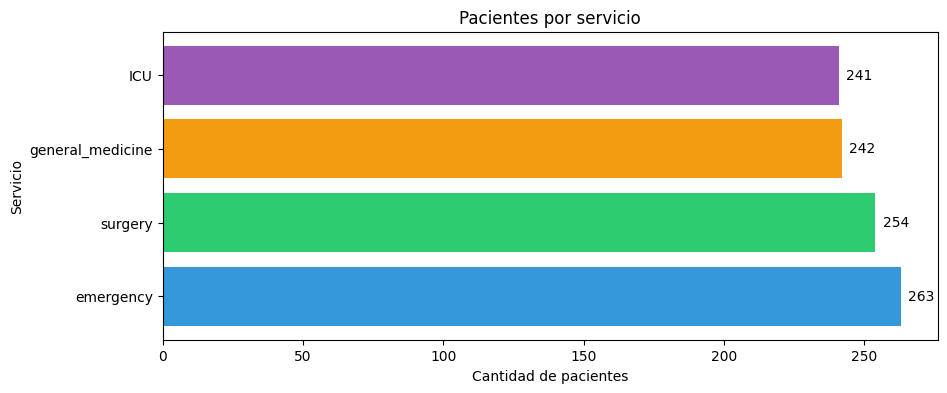

In [81]:
# Distribuciones de servicio
service_dist = df_patients['service'].value_counts()
print("Pacientes por servicio")
print(service_dist)

# Visualizacion
fig, ax = plt.subplots(figsize=(10, 4));

cmap = plt.get_cmap('tab20')                    # elige colormap (tab20, viridis, etc.)
colors = ['#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#e74c3c']

ax.barh(service_dist.index, service_dist.values, color=colors)
ax.set_xlabel('Cantidad de pacientes')
ax.set_ylabel("Servicio")
ax.set_title('Pacientes por servicio')

# anotar valores al final de cada barra
x_off = max(1, service_dist.max() * 0.01)
for i, v in enumerate(service_dist.values):
    ax.text(v + x_off, i, str(v), va='center')

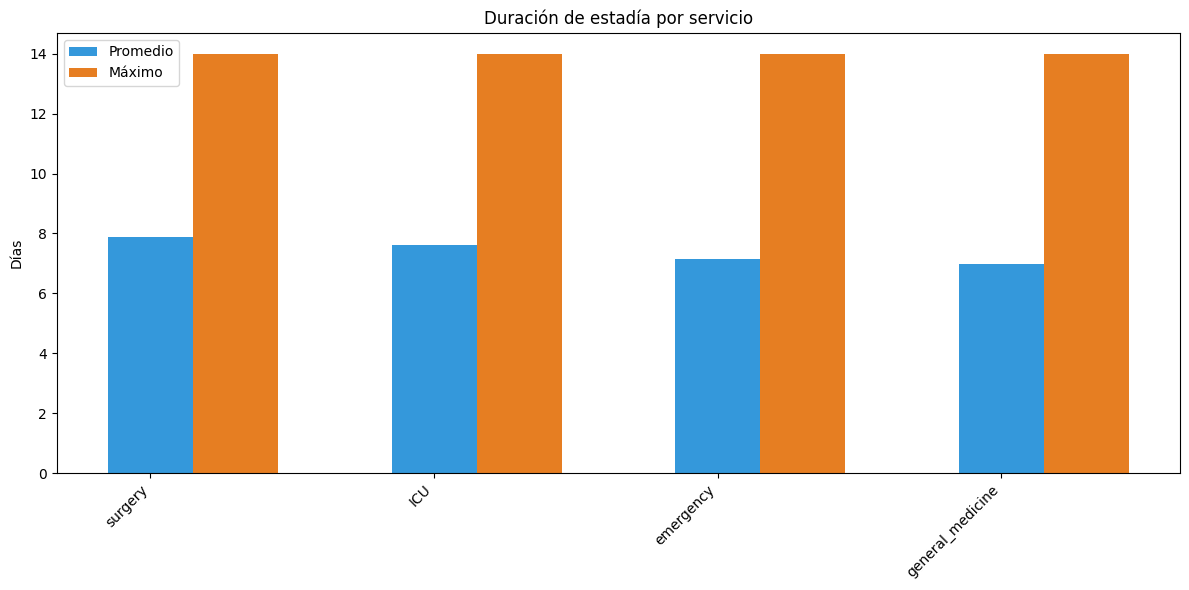

                      mean  max
service                        
surgery           7.866142   14
ICU               7.605809   14
emergency         7.159696   14
general_medicine  6.995868   14


In [80]:
# Duracion de la estadia por servicio
agg = df_patients.groupby('service')["length_of_stay"].agg(['mean', 'max']).sort_values('mean', ascending=False)

# Creamos los indices para cada uno de los servicios ind = [1, 2, 3, 4]
ind = np.arange(len(agg))
width = 0.3

# Visualizacion 
plt.figure(figsize=(12,6))
plt.bar(ind,         agg['mean'], width, label='Promedio', color="#3498db")
plt.bar(ind + width, agg['max'], width, label='Máximo', color='#e67e22')

plt.xticks(ind, agg.index, rotation=45, ha='right')
plt.ylabel('Días')
plt.title(f'Duración de estadía por servicio')
plt.legend()
plt.tight_layout()
plt.show()
print(agg)
